In [2]:
import pyodbc
import pandas as pd
from pandas import DataFrame
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

### Creating a Connection with Access Database and Pulling Data into Python

In [4]:
pyodbc.dataSources()

{'Excel Files': 'Microsoft Excel Driver (*.xls, *.xlsx, *.xlsm, *.xlsb)',
 'MS Access Database': 'Microsoft Access Driver (*.mdb, *.accdb)',
 'dBASE Files': 'Microsoft Access dBASE Driver (*.dbf, *.ndx, *.mdx)'}

In [3]:
# Define components of our connection string
driver = '{Microsoft Access Driver (*.mdb, *.accdb)}'
filepath = 'data/wildlife.accdb'

# Create connection String to the Database

cnxn = pyodbc.connect(driver = driver, dbq = filepath)

crsr = cnxn.cursor()

In [4]:
# Define the components of our query
table_name = 'STRIKE_REPORTS'

# define a query
query = 'SELECT * FROM {}'.format(table_name)

#execute the query
crsr.execute(query)

In [8]:
# fetch one row
one_row = crsr.fetchone()
one_row

(608274, datetime.datetime(1990, 10, 15, 0, 0), 10, 1990, None, 'Night', 'KMIE', 'DELAWARE COUNTY REGIONAL ARPT', Decimal('40.24235000'), Decimal('-85.39586000'), None, 'IN', 'AGL ', None, 'PVT', 'PRIVATELY OWNED', 'NULL', 'NULL', 'C-172', '226', '07', '07', '10', 'A  ', '1', 'A', '1', '7', 'NULL', 'NULL', 'NULL', 'Approach', 200, 70, None, 'No Cloud', 'None', None, None, None, None, None, False, False, 'N', False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, None, None, None, None, 'UNKBS', 'Unknown bird - small', 'NO DAMAGE', False, False, 'No', '1', '1', 'Small', None, None, None, 'OPER = CHARLES WEATHERLY /Legacy Record=100033/', 'REDACTED', 'REDACTED', 'FAA Form 5200-7', 'Tower', datetime.datetime(1998, 12, 4, 0, 0), False)

In [9]:
# Access one column

display(one_row[0])
display(one_row.TIME_OF_DAY)

608274

'Night'

In [10]:
# data = crsr.fetchall()

In [5]:
# call the data into a pandas dataframe
wildlife = pd.read_sql(sql = query, con = cnxn)

In [172]:
wildlife.shape

(256679, 100)

In [7]:
wildlife.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256679 entries, 0 to 256678
Data columns (total 100 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   INDEX_NR               256679 non-null  int64         
 1   INCIDENT_DATE          256679 non-null  datetime64[ns]
 2   INCIDENT_MONTH         256679 non-null  int64         
 3   INCIDENT_YEAR          256679 non-null  int64         
 4   TIME                   135604 non-null  object        
 5   TIME_OF_DAY            149838 non-null  object        
 6   AIRPORT_ID             256679 non-null  object        
 7   AIRPORT                256679 non-null  object        
 8   LATITUDE               225331 non-null  float64       
 9   LONGITUDE              225331 non-null  float64       
 10  RUNWAY                 194163 non-null  object        
 11  STATE                  225331 non-null  object        
 12  FAAREGION              225331 non-null  obj

In [8]:
wildlife.columns = wildlife.columns.str.lower()

In [9]:
pd.set_option('max_columns', None)

In [10]:
wildlife.head()

,index_nr,incident_date,incident_month,incident_year,time,time_of_day,airport_id,airport,latitude,longitude,runway,state,faaregion,location,opid,operator,reg,flt,aircraft,ama,amo,ema,emo,ac_class,ac_mass,type_eng,num_engs,eng_1_pos,eng_2_pos,eng_3_pos,eng_4_pos,phase_of_flight,height,speed,distance,sky,precipitation,aos,cost_repairs,cost_other,cost_repairs_infl_adj,cost_other_infl_adj,ingested,indicated_damage,damage_level,str_rad,dam_rad,str_windshld,dam_windshld,str_nose,dam_nose,str_eng1,dam_eng1,ing_eng1,str_eng2,dam_eng2,ing_eng2,str_eng3,dam_eng3,ing_eng3,str_eng4,dam_eng4,ing_eng4,str_prop,dam_prop,str_wing_rot,dam_wing_rot,str_fuse,dam_fuse,str_lg,dam_lg,str_tail,dam_tail,str_lghts,dam_lghts,str_other,dam_other,other_specify,effect,effect_other,bird_band_number,species_id,species,remarks,remains_collected,remains_sent,warned,num_seen,num_struck,size,enroute_state,nr_injuries,nr_fatalities,comments,reported_name,reported_title,source,person,lupdate,transfer
0,608274,1990-10-15,10,1990,None,Night,KMIE,DELAWARE COUNTY REGIONAL ARPT,40.24235,-85.39586,None,IN,AGL,None,PVT,PRIVATELY OWNED,NULL,NULL,C-172,226,07,07,10,A,1,A,1,7,NULL,NULL,NULL,Approach,200.0,70.0,NaN,No Cloud,None,NaN,NaN,NaN,NaN,NaN,False,False,N,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,None,None,None,NaN,UNKBS,Unknown bird - small,NO DAMAGE,False,False,No,1,1,Small,None,NaN,NaN,OPER = CHARLES WEATHERLY /Legacy Record=100033/,REDACTED,REDACTED,FAA Form 5200-7,Tower,1998-12-04,False
1,608275,1993-08-01,8,1993,None,Day,KMSY,LOUIE ARMSTRONG NEW ORLEANS INTL ARPT,29.99339,-90.25803,1,LA,ASW,None,TWA,TRANS WORLD AIRLINES,NULL,NULL,B-727,148,94,34,10,A,4,D,3,5,6,5,NULL,Landing Roll,0.0,NaN,0.0,None,None,NaN,NaN,NaN,NaN,NaN,False,False,N,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,None,None,None,NaN,UNKBM,Unknown bird - medium,NO DAMAGE REPTD. TIME = 1850Z,False,False,Unknown,NULL,1,Medium,None,NaN,NaN,/Legacy Record=100034/,REDACTED,REDACTED,AC Incident Rept,Tower,2005-05-24,False
2,608276,1996-08-18,8,1996,None,None,KORD,CHICAGO O'HARE INTL ARPT,41.97960,-87.90446,22R,IL,AGL,None,UAL,UNITED AIRLINES,NULL,1228,B-757-200,148,26,34,40,A,4,D,2,1,1,NULL,NULL,Landing Roll,0.0,NaN,0.0,None,None,NaN,NaN,NaN,NaN,NaN,False,False,N,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,None,None,None,NaN,ZT1,Blackbirds,BLACKBIRD.,False,False,Unknown,NULL,1,Small,None,NaN,NaN,/Legacy Record=100035/,REDACTED,REDACTED,Air Transport Report,Air Transport Operations,2007-12-20,False
3,608277,1993-09-19,9,1993,None,Day,KMHT,MANCHESTER AIRPORT,42.93452,-71.43706,35,NH,ANE,None,PVT,PRIVATELY OWNED,N19CT,NULL,BE-33,123,06,13,16,A,1,A,1,7,NULL,NULL,NULL,Approach,1800.0,150.0,8.0,No Cloud,None,NaN,NaN,NaN,NaN,NaN,False,True,S,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,None,Precautionary Landing,None,NaN,UNKBL,Unknown bird - large,A/C WAS 8NM SE OF ARPT & OBSERVED SEV. BIRDS P...,False,False,No,2-10,1,Large,None,NaN,NaN,SOURCE = 5200-7 & NON-COM INCIDENT REPT.OPERAT...,REDACTED,REDACTED,Multiple,Tower,1998-05-11,False
4,608278,1991-03-23,3,1991,None,Night,KELP,EL PASO INTL ARPT,31.80667,-106.37781,26L,TX,ASW,None,AAL,AMERICAN AIRLINES,N887AA,NULL,B-727,148,94,34,10,A,4,D,3,5,6,5,NULL,Approach,200.0,135.0,NaN,No Cloud,None,NaN,NaN,NaN,NaN,NaN,False,False,N,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,Fal

In [11]:
acraftvswild = wildlife.copy()

### Removing Unnecessary columns from the data

In [12]:
acraftvswild.drop(['transfer', 'lupdate', 'person', 'source', 'reported_name', 'reported_title', 'index_nr'], axis=1, inplace=True)

In [13]:
acraftvswild.describe()

,incident_month,incident_year,latitude,longitude,height,speed,distance,aos,cost_repairs,cost_other,cost_repairs_infl_adj,cost_other_infl_adj,bird_band_number,nr_injuries,nr_fatalities
count,256679.000000,256679.000000,225331.000000,225331.000000,135938.000000,87446.000000,164557.000000,12767.000000,4.851000e+03,4.392000e+03,4.851000e+03,4.392000e+03,5.400000e+01,258.000000,17.000000
mean,7.224416,2010.485556,36.892175,-91.645543,861.317571,142.388434,0.786167,91.891345,1.306724e+05,1.859627e+04,1.648377e+05,2.378029e+04,1.626670e+08,1.298450,2.294118
std,2.775898,7.973133,6.859315,25.019876,1839.807010,46.360404,3.528900,409.965075,7.973260e+05,1.286105e+05,9.727042e+05,1.799322e+05,6.236813e+07,0.774143,1.896204
min,1.000000,1990.000000,-37.673333,-177.381000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,1.000000
25%,5.000000,2005.000000,33.220630,-99.965610,0.000000,120.000000,0.000000,1.000000,2.500000e+03,2.000000e+02,3.165000e+03,2.307500e+02,1.357785e+08,1.000000,1.000000
50%,8.000000,2012.000000,38.805810,-87.904460,50.000000,140.000000,0.000000,3.000000,1.141700e+04,6.000000e+02,1.477000e+04,6.900000e+02,1.893115e+08,1.000000,2.000000
75%,9.000000,2017.000000,40.850970,-80.417940,800.000000,160.000000,0.000000,24.000000,5.000000e+04,5.000000e+03,5.940000e+04,6.547500e+03,1.947486e+08,1.000000,3.000000
max,12.000000,2021.000000,71.285450,178.559228,31300.000000,1250.000000,99.000000,10080.000000,3.600000e+07,5.000000e+06,4.341600e+07,6.610000e+06,2.791613e+08,7.000000,8.000000


#### Check cost of repair with respect to cases where damage was indicated 

In [15]:
acraftvswild.groupby(['indicated_damage'])['cost_repairs'].sum()

indicated_damage
False        28885.0
True     633863058.0
Name: cost_repairs, dtype: float64

#### The repair cost for strikes where damage was indicated was almost $634M

In [16]:

acraftvswild.groupby(['indicated_damage'])['cost_repairs'].count()

indicated_damage
False      33
True     4818
Name: cost_repairs, dtype: int64

#### There were total 4818 such cases where damage was indicated and repair_cost was incurred

### Replacing damage_level acronyms with values

In [112]:
acraftvswild.groupby(['damage_level'])['cost_repairs'].count()

damage_level
D       35
M     2071
M?    1100
N       30
S     1608
Name: cost_repairs, dtype: int64

In [113]:
damage_repl_dict = {'D' : 'Destroyed - Beyond Repair', 'M' : 'Minor Damage', 'M?' : 'Uncertain Damage', 
                                    'N' : 'No Damage', 'S' : 'Major Damage'}

In [114]:
acraftvswild['damage_level_code'] = acraftvswild.damage_level.replace(damage_repl_dict)

In [115]:
acraftvswild.groupby(['damage_level_code'])['cost_repairs'].sum().sort_values(ascending = True)

damage_level_code
No Damage                       106235.0
Minor Damage                  37070677.0
Destroyed - Beyond Repair     65291500.0
Uncertain Damage              71272288.0
Major Damage                 460148293.0
Name: cost_repairs, dtype: float64

Text(0, 0.5, 'Damage Level')

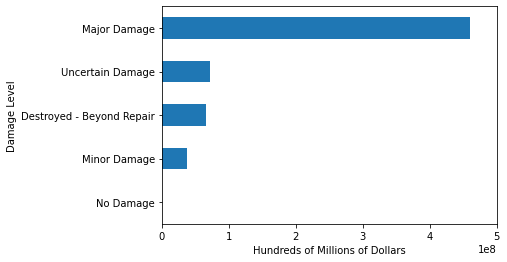

In [92]:
acraftvswild.groupby(['damage_level_code'])['cost_repairs'].sum().sort_values(ascending = True).plot(kind = 'barh')
plt.xlabel("Hundreds of Millions of Dollars")
plt.xlim([0,500000000])
plt.ylabel("Damage Level")

#### Almost 72.5% of the cost of repair was incurred where Major Damage was caused by strikes

In [94]:
pd.set_option('default', None)

In [20]:
acraftvswild['effect'].unique()

array([None, 'None', 'Precautionary Landing', 'Aborted Take-off', 'Other',
       'Engine Shutdown', 'Engine Shutdown, Precautionary Landing',
       'Aborted Take-off, Engine Shutdown',
       'Aborted Take-off, Engine Shutdown, Other', 'None, Other',
       'Aborted Take-off, Precautionary Landing'], dtype=object)

### Replacing ac_class acronyms with values

In [149]:
ac_class_repl_dict = {'A' : 'Airplane', 'B' : 'Helicopter', 'C' : 'Glider', 'D' : 'Balloon', 'F' : 'Dirigible',
                      'I' : 'Gyroplane', 'J' : 'Ultralight', 'Y' : 'Other', 'Z' : 'Unkown'}

In [133]:
acraftvswild['ac_class_code'] = acraftvswild.ac_class.replace(ac_class_repl_dict)

In [101]:
acraftvswild.groupby(['ac_class_code'])['cost_repairs'].sum()

ac_class_code
A       620963765.0
B        11815195.0
C           17000.0
J               0.0
NULL      1038983.0
Y               0.0
Name: cost_repairs, dtype: float64

#### Apparently we are not able to replace the values as expected. Below we check for extra spaces in the string values

In [143]:
acraftvswild['ac_class'].unique()

array(['A  ', 'NULL', 'B  ', 'J  ', 'C  ', None, 'Y  '], dtype=object)

As we can see every value has 2 extra spaces at the end. We use strip() to remove extra spaces and continue with the conversion

In [150]:
acraftvswild['ac_class'] = acraftvswild['ac_class'].str.strip()

In [151]:
acraftvswild['ac_class_code'] = acraftvswild.ac_class.replace(ac_class_repl_dict)

In [152]:
acraftvswild.groupby(['ac_class_code'])['cost_repairs'].sum().sort_values(ascending = False)

ac_class_code
Airplane      620963765.0
Helicopter     11815195.0
NULL            1038983.0
Glider            17000.0
Other                 0.0
Ultralight            0.0
Name: cost_repairs, dtype: float64

#### Airplanes have incurred the highest cost of repair as compared to other types of aircrafts

#### Looking at the top 10 operators by number of strikes where damage was indicated

In [22]:
acraftvswild.loc[acraftvswild.indicated_damage == True].groupby(['operator'])['indicated_damage'].count().sort_values(ascending = False).head(10)

operator
BUSINESS              5108
UNITED AIRLINES       1344
PRIVATELY OWNED       1314
SOUTHWEST AIRLINES    1149
AMERICAN AIRLINES     1001
DELTA AIR LINES        909
1US AIRWAYS            576
FEDEX EXPRESS          428
UPS AIRLINES           390
SKYWEST AIRLINES       295
Name: indicated_damage, dtype: int64

In [159]:
operator_cost = acraftvswild.groupby(['operator'])['cost_repairs'].sum()

In [166]:
acraftvswild.groupby(['operator'])['cost_repairs'].sum().sort_values(ascending = False).where(operator_cost >= 10000000).dropna()

operator
BUSINESS                          137528520.0
FEDEX EXPRESS                      75503956.0
UNITED AIRLINES                    68814394.0
US AIRWAYS                         38778304.0
DELTA AIR LINES                    36146817.0
JETBLUE AIRWAYS                    35760450.0
AMERICAN AIRLINES                  25357412.0
BOEING COMMERCIAL AIRPLANE GRP     15398260.0
SOUTHWEST AIRLINES                 14667842.0
SKYWEST AIRLINES                   13904092.0
UPS AIRLINES                       11964534.0
Name: cost_repairs, dtype: float64

<AxesSubplot:>

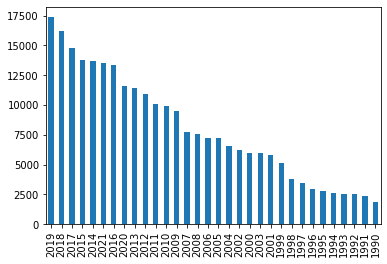

In [158]:
acraftvswild.incident_year.value_counts().plot(kind = 'bar')

In [167]:
acraftvswild.time_of_day.value_counts()

Day      91934
Night    45552
Dusk      6838
Dawn      5514
Name: time_of_day, dtype: int64

In [170]:
acraftvswild.phase_of_flight.value_counts()

Approach        67622
Landing Roll    28949
Take-off Run    27653
Climb           24902
En Route         4799
Departure        2106
Descent          2077
Local             861
Arrival           633
Taxi              586
Parked            105
Unknown            11
Name: phase_of_flight, dtype: int64

In [174]:
acraftvswild.shape

(256679, 95)

In [175]:
acraftvswild.phase_of_flight.isnull().value_counts()

False    160304
True      96375
Name: phase_of_flight, dtype: int64

#### Out of a Total of 256679 cases of strike, we do not have data about the phase of flight during which the strike took place for 96,375 records.

In [27]:
acraftvswild['size'].value_counts()

Small     157387
Medium     63333
Large      16643
Name: size, dtype: int64

In [28]:
acraftvswild.groupby(['size'])['cost_repairs'].sum()

size
Large     342670915.0
Medium    207667182.0
Small      79367725.0
Name: cost_repairs, dtype: float64

### Setting Incident date as index for time series analysis

In [179]:
df=acraftvswild.set_index('incident_date')
df.head(2)

,incident_month,incident_year,time,time_of_day,airport_id,airport,latitude,longitude,runway,state,faaregion,location,opid,operator,reg,flt,aircraft,ama,amo,ema,emo,ac_class,ac_mass,type_eng,num_engs,eng_1_pos,eng_2_pos,eng_3_pos,eng_4_pos,phase_of_flight,height,speed,distance,sky,precipitation,aos,cost_repairs,cost_other,cost_repairs_infl_adj,cost_other_infl_adj,ingested,indicated_damage,damage_level,str_rad,dam_rad,str_windshld,dam_windshld,str_nose,dam_nose,str_eng1,dam_eng1,ing_eng1,str_eng2,dam_eng2,ing_eng2,str_eng3,dam_eng3,ing_eng3,str_eng4,dam_eng4,ing_eng4,str_prop,dam_prop,str_wing_rot,dam_wing_rot,str_fuse,dam_fuse,str_lg,dam_lg,str_tail,dam_tail,str_lghts,dam_lghts,str_other,dam_other,other_specify,effect,effect_other,bird_band_number,species_id,species,remarks,remains_collected,remains_sent,warned,num_seen,num_struck,size,enroute_state,nr_injuries,nr_fatalities,comments,damage_level_code,ac_class_code
incident_date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1990-10-15,10,1990,None,Night,KMIE,DELAWARE COUNTY REGIONAL ARPT,40.24235,-85.39586,None,IN,AGL,None,PVT,PRIVATELY OWNED,NULL,NULL,C-172,226,07,07,10,A,1,A,1,7,NULL,NULL,NULL,Approach,200.0,70.0,NaN,No Cloud,None,NaN,NaN,NaN,NaN,NaN,False,False,N,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,None,None,None,NaN,UNKBS,Unknown bird - small,NO DAMAGE,False,False,No,1,1,Small,None,NaN,NaN,OPER = CHARLES WEATHERLY /Legacy Record=100033/,No Damage,Airplane
1993-08-01,8,1993,None,Day,KMSY,LOUIE ARMSTRONG NEW ORLEANS INTL ARPT,29.99339,-90.25803,1,LA,ASW,None,TWA,TRANS WORLD AIRLINES,NULL,NULL,B-727,148,94,34,10,A,4,D,3,5,6,5,NULL,Landing Roll,0.0,NaN,0.0,None,None,NaN,NaN,NaN,NaN,NaN,False,False,N,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,None,None,None,NaN,UNKBM,Unknown bird - medium,NO DAMAGE REPTD. TIME = 1850Z,False,False,Unknown,NULL,1,Medium,None,NaN,NaN,/Legacy Record=100034/,No Damage,Airplane


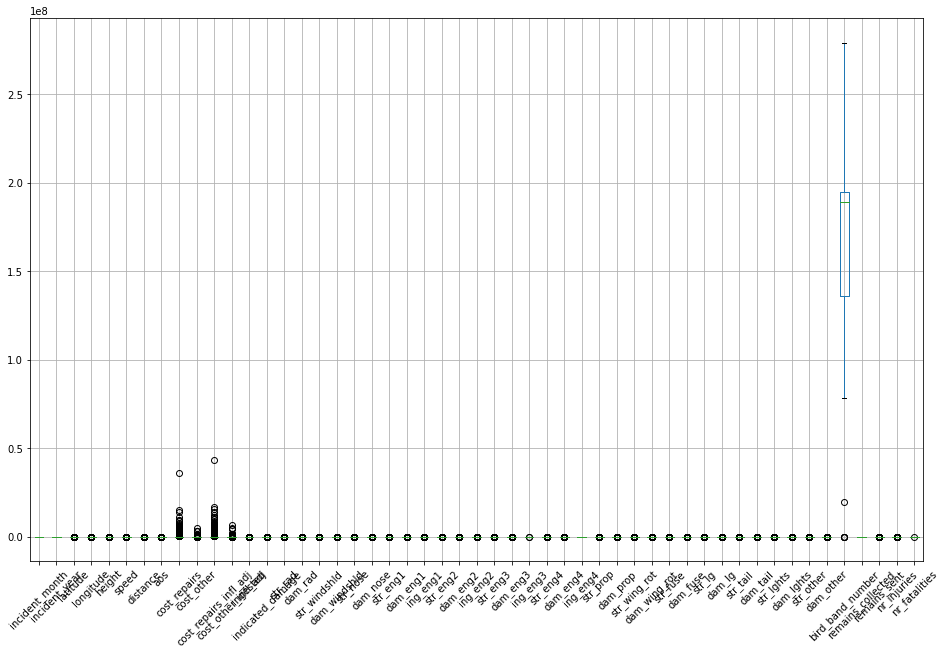

In [181]:
plt.figure(figsize=(16,10))
df.boxplot()
plt.xticks(rotation=45)
plt.show()

In [199]:
df['effect'].value_counts()

None                                        119040
Precautionary Landing                         7347
Other                                         2977
Aborted Take-off                              2769
Engine Shutdown                                475
Engine Shutdown, Precautionary Landing          26
Aborted Take-off, Engine Shutdown                1
Aborted Take-off, Engine Shutdown, Other         1
None, Other                                      1
Aborted Take-off, Precautionary Landing          1
Name: effect, dtype: int64

In [200]:
effect = df['effect'].value_counts()

<AxesSubplot:>

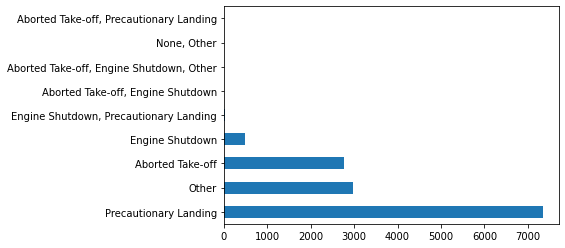

In [201]:
effect[1:].plot(kind = "barh")

In [202]:
df.groupby(['effect'])['effect_other'].value_counts().sort_values(ascending = False).head(10)

effect  effect_other              
Other   DELAYED FLIGHT                453
        SCHEDULE INTERRUPTION         358
        EVASIVE MANEUVER              203
        AIRCRAFT CONTROLS EFFECTED    189
        GO-AROUND                     162
        VISIBILITY IMPAIRED            60
        ABORTED TOUCH & GO             59
        GO AROUND                      53
        EMERGENCY                      49
        AVOIDANCE MANEUVER             45
Name: effect_other, dtype: int64

### Comparing the species vs size of birds causing the most strikes

Text(0.5, 0, 'Nuber of Strikes')

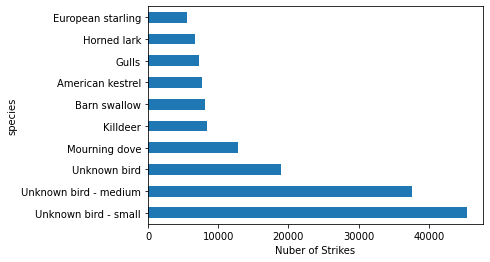

In [212]:
df.groupby('species').size().sort_values(ascending = False).head(10).plot(kind = 'barh')
plt.xlabel('Nuber of Strikes')

Text(0.5, 0, 'Nuber of Strikes')

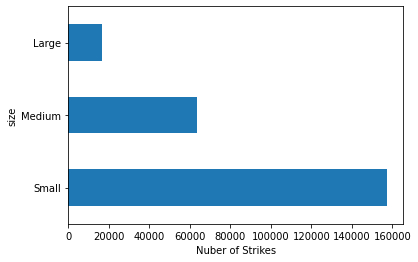

In [214]:
df.groupby('size').size().sort_values(ascending = False).plot(kind = 'barh')
plt.xlabel('Nuber of Strikes')

#### Even though we do not have the exact species causing the highest number of strikes, we can definitely comment on the size i.e. Small size birds cause a significantly high number of strikes as compared to Large birds

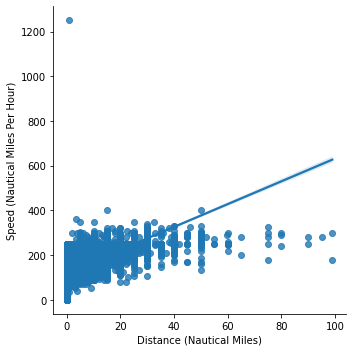

In [219]:
j = sns.lmplot(x="distance", y="speed", data=df)
j.set(xlabel = 'Distance (Nautical Miles)', ylabel = 'Speed (Nautical Miles Per Hour)')

As we earlier saw that the highest number of strikes happen during the "Approach" phase of flight. Something similar is replecated above as we can see most of the strikes happening within 40 Nautical Miles of the Airport. 

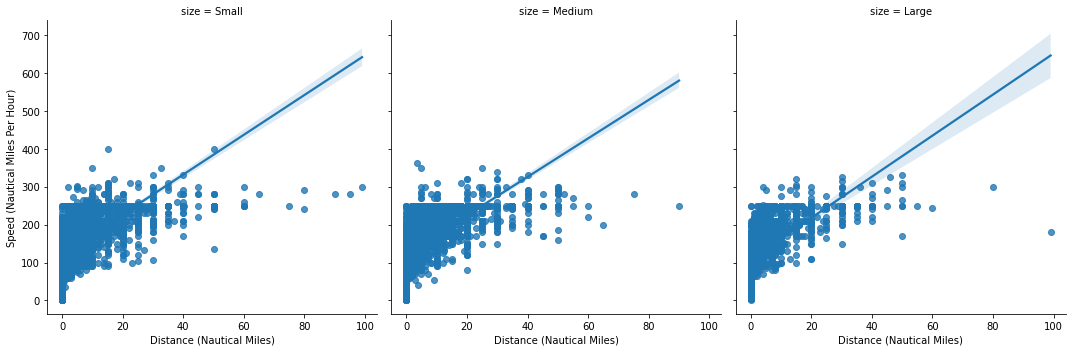

In [220]:
jx = sns.lmplot(x="distance", y="speed", col='size', data=df)
jx.set(xlabel = 'Distance (Nautical Miles)', ylabel = 'Speed (Nautical Miles Per Hour)')

In [61]:
df.index

DatetimeIndex(['1990-10-15', '1993-08-01', '1996-08-18', '1993-09-19',
               '1991-03-23', '1990-10-26', '1990-08-22', '1995-04-30',
               '1991-08-19', '1991-04-24',
               ...
               '2021-12-02', '2021-12-02', '2021-12-02', '2021-12-02',
               '2021-12-03', '2021-12-01', '2021-12-01', '2021-12-02',
               '2021-12-03', '1991-05-15'],
              dtype='datetime64[ns]', name='incident_date', length=256679, freq=None)

In [62]:
year = df.resample('Y').size()
year.head()

incident_date
1990-12-31    1848
1991-12-31    2389
1992-12-31    2567
1993-12-31    2575
1994-12-31    2634
Freq: A-DEC, dtype: int64

<AxesSubplot:xlabel='incident_date'>

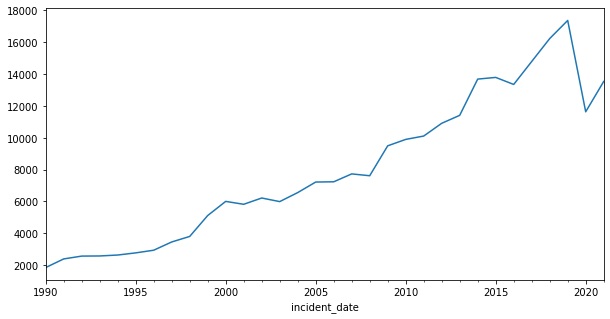

In [215]:
plt.figure(figsize=[10,5])
year.plot()

#### After plotting the number of cases over the years we can see that the number of strikes has been almost continuously increasing. We see a sharp dip in strikes in the year 2020. This could probably be cause of lesser number of flights running due to the pandemic.

### Below we dive deeper into the analysis by looking at the number of strikes month wise and comparing results for the years 2010 to 2020

In [64]:
df10 = df[df['incident_year']>= 2010]
df10 = df10.assign(strike_count = 1)

In [65]:
piv = pd.pivot_table(df10, index=['incident_month'],columns=['incident_year'], values = ['strike_count'], aggfunc= sum)

In [66]:
piv.drop([('strike_count', 2021)], axis = 1, inplace = True)

<AxesSubplot:xlabel='incident_month'>

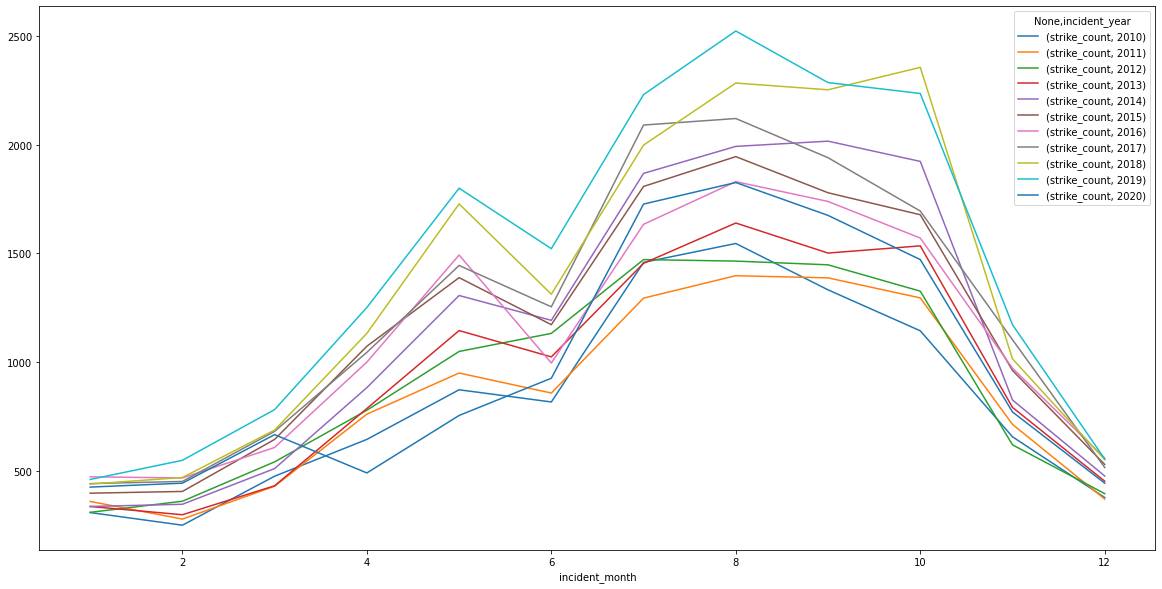

In [67]:
piv.plot(figsize = (20,10))

#### Here we have found a very noticebale pattern in the number of strikes over the course of any given year. The peak takes place between the months July and October followed by a smaller peak in the month of May.

In [68]:
#df20 = df.drop(['latitude', 'longitude', 'bird_band_number', 'remains_collected', 'remains_sent', 'nr_injuries', 'nr_fatalities', 'cost_repairs', 'cost_other', 'cost_repairs_infl_adj', 'cost_other_infl_adj'], axis = 1)

In [69]:
#df20 = df.drop(['cost_repairs', 'cost_other', 'cost_repairs_infl_adj', 'cost_other_infl_adj'], axis = 1)

In [70]:
#df20 = df.replace({False: 0, True: 1}, inplace=True)

### Looking at the cost columns and adding them up to find total cost of repairs both actual and inflations adjusted

In [182]:
df['cost_repairs'].sum()

633891943.0

In [183]:
df['cost_other'].sum()

81674820.0

In [185]:
df['cost_repairs'] = df['cost_repairs'].fillna(0)

In [186]:
df['cost_other'] = df['cost_other'].fillna(0)

In [188]:
df['total_cost'] = df['cost_repairs'] + df['cost_other']

In [189]:
df['total_cost'].sum()

715566763.0

In [190]:
df['cost_repairs_infl_adj'] = df['cost_repairs_infl_adj'].fillna(0)

In [191]:
df['cost_other_infl_adj'] = df['cost_other_infl_adj'].fillna(0)

In [192]:
df['cost_repairs_infl_adj'].sum()

799627848.0

In [193]:
df['cost_other_infl_adj'].sum()

104443015.0

In [194]:
df['total_cost_infl_adj'] = df['cost_repairs_infl_adj'] + df['cost_other_infl_adj']

In [195]:
df['total_cost_infl_adj'].sum()

904070863.0

Text(0, 0.5, 'Cost (Hundred Million Dollars)')

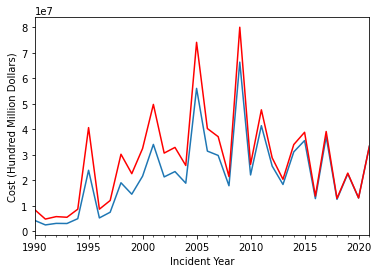

In [198]:
df.resample('Y')['total_cost'].sum().plot()
df.resample('Y')['total_cost_infl_adj'].sum().plot(color='red')
plt.xlabel('Incident Year')
plt.ylabel('Cost (Hundred Million Dollars)')

### Looking at top 10 Airports by number of cases of strikes

In [203]:
df['airport'].value_counts().sort_values(ascending=False).head(10)

UNKNOWN                            31271
DENVER INTL AIRPORT                 8376
DALLAS/FORT WORTH INTL ARPT         7142
CHICAGO O'HARE INTL ARPT            5674
JOHN F KENNEDY INTL                 4625
MEMPHIS INTL                        4340
SALT LAKE CITY INTL                 3369
SACRAMENTO INTL                     3359
DETROIT METRO WAYNE COUNTY ARPT     3180
ORLANDO INTL                        3143
Name: airport, dtype: int64

<AxesSubplot:>

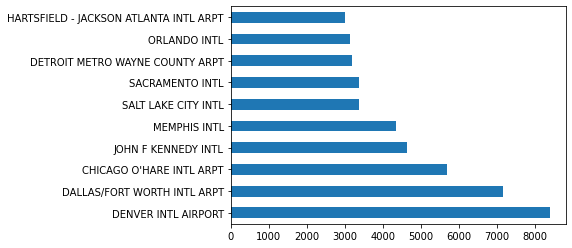

In [204]:
df['airport'].value_counts().sort_values(ascending=False)[1:].head(10).plot(kind = "barh")

### Looking at the airports where total cost of repairs incurred is grater than $1M

In [205]:
df.groupby(['airport']).filter(lambda x : x.total_cost_infl_adj.sum() >= 1000000)

,incident_month,incident_year,time,time_of_day,airport_id,airport,latitude,longitude,runway,state,faaregion,location,opid,operator,reg,flt,aircraft,ama,amo,ema,emo,ac_class,ac_mass,type_eng,num_engs,eng_1_pos,eng_2_pos,eng_3_pos,eng_4_pos,phase_of_flight,height,speed,distance,sky,precipitation,aos,cost_repairs,cost_other,cost_repairs_infl_adj,cost_other_infl_adj,ingested,indicated_damage,damage_level,str_rad,dam_rad,str_windshld,dam_windshld,str_nose,dam_nose,str_eng1,dam_eng1,ing_eng1,str_eng2,dam_eng2,ing_eng2,str_eng3,dam_eng3,ing_eng3,str_eng4,dam_eng4,ing_eng4,str_prop,dam_prop,str_wing_rot,dam_wing_rot,str_fuse,dam_fuse,str_lg,dam_lg,str_tail,dam_tail,str_lghts,dam_lghts,str_other,dam_other,other_specify,effect,effect_other,bird_band_number,species_id,species,remarks,remains_collected,remains_sent,warned,num_seen,num_struck,size,enroute_state,nr_injuries,nr_fatalities,comments,damage_level_code,ac_class_code,total_cost,total_cost_infl_adj
incident_date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1993-08-01,8,1993,None,Day,KMSY,LOUIE ARMSTRONG NEW ORLEANS INTL ARPT,29.99339,-90.25803,1,LA,ASW,None,TWA,TRANS WORLD AIRLINES,NULL,NULL,B-727,148,94,34,10,A,4,D,3,5,6,5,NULL,Landing Roll,0.0,NaN,0.0,None,None,NaN,0.0,0.0,0.0,0.0,False,False,N,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,None,None,None,NaN,UNKBM,Unknown bird - medium,NO DAMAGE REPTD. TIME = 1850Z,False,False,Unknown,NULL,1,Medium,None,NaN,NaN,/Legacy Record=100034/,No Damage,Airplane,0.0,0.0
1996-08-18,8,1996,None,None,KORD,CHICAGO O'HARE INTL ARPT,41.97960,-87.90446,22R,IL,AGL,None,UAL,UNITED AIRLINES,NULL,1228,B-757-200,148,26,34,40,A,4,D,2,1,1,NULL,NULL,Landing Roll,0.0,NaN,0.0,None,None,NaN,0.0,0.0,0.0,0.0,False,False,N,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,None,None,None,NaN,ZT1,Blackbirds,BLACKBIRD.,False,False,Unknown,NULL,1,Small,None,NaN,NaN,/Legacy Record=100035/,No Damage,Airplane,0.0,0.0
1990-10-26,10,1990,None,Night,KPDX,PORTLAND INTL (OR),45.58872,-122.59750,None,OR,ANM,None,AAL,AMERICAN AIRLINES,NULL,NULL,MD-80,583,37,34,10,A,4,D,2,5,5,NULL,NULL,Approach,300.0,140.0,NaN,No Cloud,None,NaN,0.0,0.0,0.0,0.0,False,False,N,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,None,None,None,NaN,UNKBM,Unknown bird - medium,NO DAMAGE/INJURY,False,False,No,1,1,Medium,None,NaN,NaN,DATE = POSTMARK /Legacy Record=100038/,No Damage,Airplane,0.0,0.0
1990-08-22,8,1990,None,Day,ZZZZ,UNKNOWN,NaN,NaN,None,None,None,None,USA,1US AIRWAYS,N932VJ,NULL,DC-9-30,583,21,34,10,A,4,D,2,5,5,NULL,NULL,Climb,10500.0,280.0,NaN,No Cloud,None,NaN,0.0,0.0,0.0,0.0,False,False,N,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,None,None,None,NaN,UNKBM,Unknown bird - medium,ARPT = IHO OR IHP OR IHD. POSTMARK IS PITTSBUR...,False,False,No,NULL,1,Medium,None,NaN,NaN,/Legacy Record=100039/,No Damage,Airplane,0.0,0.0
1995-04-30,4,1995,None,None,KLAX,LOS ANGELES INTL,33.94254,-118.40807,24R,CA,AWP,None,UAL,UNITED AIRLINES,NULL,2943,B-737-500,148,33,10,01,A,4,D,2,1,1,NULL,NULL,Approach,4000.0,NaN,9.0,None,None,NaN,0.0,0.0,0.0,0.0,False,False,N,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,None,None,None,NaN,UNKBM,Unknown bird - medium,None,False,False,Unknown,NULL,1,Medium,None,NaN,NaN,/Legacy Record=100040/,No Damage,Airplane,0

In [206]:
df1 = df[df.total_cost_infl_adj.groupby(df['airport']).transform('sum') > 1000000]

In [207]:
df1.groupby('airport')['total_cost_infl_adj'].sum().sort_values(ascending = False)

airport
UNKNOWN                          65909791.0
LA GUARDIA ARPT                  50440399.0
DENVER INTL AIRPORT              38945137.0
JOHN F KENNEDY INTL              36205642.0
SUBIC BAY INTL                   27020394.0
                                    ...    
BISHOP INTL ARPT                  1069104.0
ANGELINA COUNTY                   1049198.0
ASHEVILLE REGIONAL ARPT           1035838.0
CHICAGO MIDWAY INTL ARPT          1034624.0
JOHN GLENN COLUMBUS INTL ARPT     1011320.0
Name: total_cost_infl_adj, Length: 124, dtype: float64

#### Verifying the Results

In [55]:
airportcostsum = df.groupby(['airport'])['total_cost_infl_adj'].sum()

In [56]:
df.groupby(['airport'])['total_cost_infl_adj'].sum().where(airportcostsum >= 1000000).dropna().sort_values(ascending = False)

airport
UNKNOWN                          65909791.0
LA GUARDIA ARPT                  50440399.0
DENVER INTL AIRPORT              38945137.0
JOHN F KENNEDY INTL              36205642.0
SUBIC BAY INTL                   27020394.0
                                    ...    
BISHOP INTL ARPT                  1069104.0
ANGELINA COUNTY                   1049198.0
ASHEVILLE REGIONAL ARPT           1035838.0
CHICAGO MIDWAY INTL ARPT          1034624.0
JOHN GLENN COLUMBUS INTL ARPT     1011320.0
Name: total_cost_infl_adj, Length: 124, dtype: float64

### Surprisingly, LA GUARDIA ARPT has highest total cost of repairs even though it was not in the top 10 airports by the number of strikes.

### Looking at States with the total cost higher than $1M

In [57]:
statecostsum = df.groupby(['state'])['total_cost_infl_adj'].sum()

In [58]:
df.groupby(['state'])['total_cost_infl_adj'].sum().where(statecostsum >= 1000000).dropna().sort_values(ascending = False)

state
NY    96923296.0
FN    89423511.0
CA    61144032.0
FL    59030993.0
TX    47294608.0
CO    45334080.0
IL    38267378.0
OR    30872321.0
OH    26274268.0
UT    25539483.0
NJ    22285634.0
MA    21618260.0
WA    18965168.0
TN    18388363.0
PA    17700808.0
AL    17160239.0
MO    14308383.0
NE    12710347.0
AK    12609880.0
DC    12565884.0
MI    12127431.0
MN    11696113.0
OK    10391973.0
MD     9550339.0
PR     9058510.0
IN     9023214.0
AR     8086380.0
KY     7909462.0
WI     7645690.0
GA     7577871.0
NC     7302872.0
VA     7295063.0
LA     5772042.0
HI     3126553.0
SC     3032494.0
AB     2987526.0
AZ     2525425.0
DE     2348408.0
NV     2179360.0
CT     2178118.0
WV     2166428.0
SD     2040433.0
KS     1830617.0
MS     1633911.0
ME     1425530.0
WY     1244693.0
NM     1142029.0
IA     1086402.0
ND     1077657.0
Name: total_cost_infl_adj, dtype: float64

In [59]:
df.groupby('state').size().sort_values(ascending = False).where(df.groupby('state').size() > 1000).dropna()

state
TX    21968.0
CA    18583.0
FL    17822.0
NY    12209.0
IL    10857.0
CO    10704.0
PA     7577.0
TN     7409.0
OH     7388.0
NJ     6732.0
MI     6428.0
KY     5975.0
MO     5789.0
NC     5300.0
GA     4769.0
HI     4737.0
FN     4105.0
DC     3926.0
WA     3809.0
LA     3803.0
IN     3794.0
OR     3545.0
UT     3538.0
AZ     3288.0
MA     3284.0
VA     2729.0
WI     2669.0
MD     2627.0
MN     2550.0
NE     2342.0
OK     2089.0
CT     2048.0
SC     1859.0
AL     1840.0
IA     1777.0
AK     1334.0
AR     1205.0
ND     1146.0
NV     1100.0
dtype: float64

#### As we can see above, in most cases where there is a high number of strikes, the cost of repairs is also high.